In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
viruses_specs = pd.read_csv('../data/ms12syn_all_virus.csv')
viruses_type = pd.read_csv('../data/taxid_virus_type.csv')
viruses_aa_freq = pd.read_csv('../data/aminoacid_freq_all_virus.csv')

In [3]:
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}

viruses_aa_freq.columns = [d[col] if col in d else col for col in viruses_aa_freq.columns]

In [4]:
viruses_type[viruses_type['Type'] == '-']['taxid'].unique()
viruses_type['taxid'] = viruses_type['taxid'].apply(str)
viruses_specs['taxid'] = viruses_specs['taxid'].apply(str)
viruses_aa_freq['taxid'] = viruses_aa_freq['taxid'].apply(str)

In [5]:
#viruses_specs.loc[viruses_specs['taxid'] == '118655(1933309)','taxid'] = '118655'
#viruses_type.loc[viruses_type['taxid'] == '1933309','taxid'] = '118655'

#viruses_specs.loc[viruses_specs['taxid'] == '54290_1985356','taxid'] = '54290'
#viruses_type.loc[viruses_type['taxid'] == '1985356','taxid'] = '54290'

In [6]:
viruses_type = viruses_type.rename(columns={"taxid": "virus_name", "Type" : "RNAsense"})
viruses_type = viruses_type[['virus_name', "RNAsense"]]

In [7]:
viruses_specs = viruses_specs.rename(columns={"taxid": "virus_name"})
viruses_specs = viruses_specs.merge(viruses_type, how='left', on='virus_name')

In [8]:
#viruses_specs.loc[viruses_specs['virus_name'].isin(['11320_1', '11320_2', '3052493', '1133363', '3052763']), 'RNAsense'] = '-'

In [9]:
viruses_specs

,Mut,ObsNum,ExpNum,MutSpec,MutSpec_q05,MutSpec_median,MutSpec_q95,virus_name,RNAsense
0,A>C,222.10000,109.4550,0.109127,0.098138,0.109519,0.118038,10407,ds
1,A>G,348.58100,159.7600,0.117342,0.109575,0.117365,0.127528,10407,ds
2,A>T,114.44900,83.7826,0.073464,0.061877,0.074088,0.084475,10407,ds
3,C>A,172.60900,154.1570,0.060217,0.053061,0.060244,0.065731,10407,ds
4,C>G,28.65490,131.8260,0.011690,0.009010,0.012031,0.014995,10407,ds
...,...,...,...,...,...,...,...,...,...
379,G>C,2.13421,72.8211,0.003805,0.000000,0.003394,0.007554,77763,ds
380,G>T,50.06880,72.8211,0.089263,0.066487,0.086102,0.114044,77763,ds
381,T>A,49.02400,198.8740,0.032003,0.025325,0.032111,0.040197,77763,ds
382,T>C,478.02300,482.0980,0.128729,0.111404,0.130994,0.142362,77763,ds


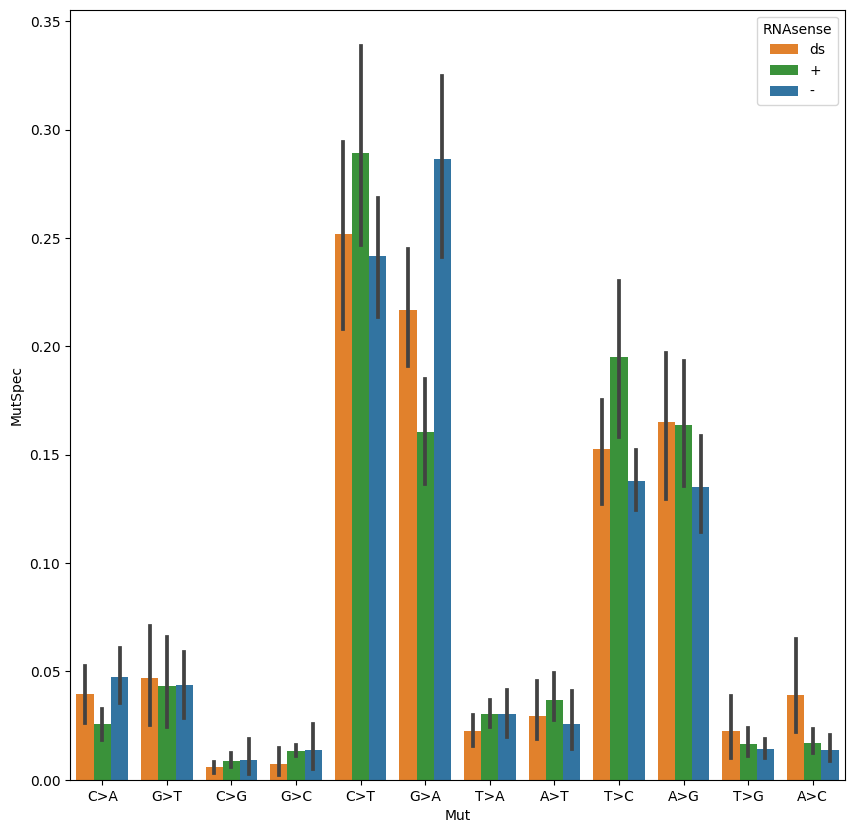

In [10]:
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}
sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]
colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]
palette = {
    'ds': 'tab:orange',
    '+': 'tab:green',
    '-': 'tab:blue'
}
fig = plt.figure(figsize=(10, 10))
ax = sns.barplot(x="Mut", y='MutSpec', hue="RNAsense", data=viruses_specs, order=sbs12_ordered, palette=palette, ax=fig.gca())
fig.savefig('../figures/mean_mutspecs.pdf', dpi=300, bbox_inches = 'tight')


In [11]:
viruses_aa_freq = viruses_aa_freq.drop('refseq_id', axis=1)

In [12]:
viruses_aa_freq = viruses_aa_freq.set_index(list(viruses_aa_freq)[0]).stack()

In [13]:
viruses_aa_freq = viruses_aa_freq.reset_index()

In [14]:
viruses_aa_freq = viruses_aa_freq.rename(columns={"taxid": "virus_name", 'level_1':'aa', 0:'count'})
viruses_aa_freq = viruses_aa_freq.merge(viruses_type, how='left', on='virus_name')

In [15]:
#viruses_aa_freq.loc[viruses_aa_freq['virus_name'].isin(['11320', '3052493', '1133363', '3052763', '3052310']), 'RNAsense'] = '-'

In [16]:
viruses_aa_freq

,virus_name,aa,count,RNAsense
0,10990,Met,0.024014,ds
1,10990,Leu,0.101132,ds
2,10990,Lys,0.066222,ds
3,10990,Val,0.061991,ds
4,10990,Asn,0.070771,ds
...,...,...,...,...
709,77763,His,0.022957,ds
710,77763,Trp,0.006077,ds
711,77763,Glu,0.053342,ds
712,77763,Cys,0.012660,ds


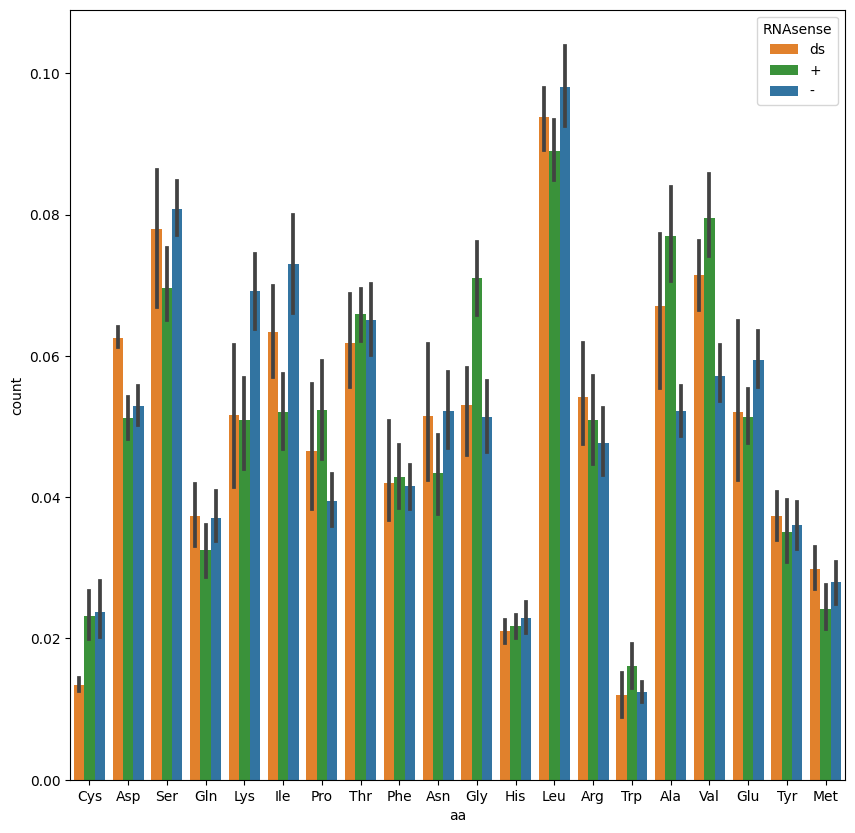

In [17]:
fig = plt.figure(figsize=(10, 10))
order_list = list(d.values())
ax = sns.barplot(x="aa", y='count', hue="RNAsense", data=viruses_aa_freq, ax=fig.gca(), palette=palette, order = order_list)
fig.savefig('../figures/mean_aa.pdf', dpi=300, bbox_inches = 'tight')

In [18]:
rdrp_data = pd.read_csv('../data/FullData.txt', sep='\t')

In [19]:
rdrp_data.head()

,Order,Family,Strand,Species,-,A,C,D,E,F,...,N,P,Q,R,S,T,V,Y,W,X
Alphaflexiviridae_u17540|Narcissus,Tymovirales,Alphaflexiviridae,positive,u17540|Narcissus,230,12,1,8,5,7,...,5,2,4,2,3,8,2,4,0,0
Alphaflexiviridae_u17602,Tymovirales,Alphaflexiviridae,positive,u17602,230,9,1,8,5,6,...,4,3,5,2,5,7,4,4,1,0
Alphaflexiviridae_u4329|Lily,Tymovirales,Alphaflexiviridae,positive,u4329|Lily,230,11,2,7,5,5,...,3,3,7,1,4,7,2,4,0,0
Alphaflexiviridae_u6633|Papaya,Tymovirales,Alphaflexiviridae,positive,u6633|Papaya,230,11,1,8,5,7,...,4,3,4,1,4,9,2,2,0,0
Alphaflexiviridae_u11143,Tymovirales,Alphaflexiviridae,positive,u11143,230,10,1,8,6,9,...,5,3,4,2,3,7,5,4,0,0


In [20]:
rdrp_data.columns = [d[col] if col in d else col for col in rdrp_data.columns]

In [21]:
rdrp_strand = rdrp_data['Strand'].reset_index()
rdrp_data = rdrp_data[list(d.values())]

In [22]:
rdrp_data['total'] = rdrp_data.sum(axis=1)
for col in rdrp_data.columns:
    rdrp_data[col] = rdrp_data[col]/rdrp_data['total']
rdrp_data = rdrp_data.drop('total',axis=1)
rdrp_data = rdrp_data.fillna(0)

In [23]:
rdrp_data_stack = rdrp_data.stack().reset_index()

In [24]:
rdrp_strand

,index,Strand
0,Alphaflexiviridae_u17540|Narcissus,positive
1,Alphaflexiviridae_u17602,positive
2,Alphaflexiviridae_u4329|Lily,positive
3,Alphaflexiviridae_u6633|Papaya,positive
4,Alphaflexiviridae_u11143,positive
...,...,...
77203,Yueviridae_u162948,negative
77204,Yueviridae_u195939,negative
77205,Yueviridae_u242785,negative
77206,Yueviridae_u116278,negative


In [25]:
rdrp_data_stack = rdrp_data_stack.rename(columns={"level_0": "index", 'level_1':'aa', 0:'count'})
rdrp_data_stack = rdrp_data_stack.merge(rdrp_strand, how='left', on='index')

In [26]:
rdrp_data_stack

,index,aa,count,Strand
0,Alphaflexiviridae_u17540|Narcissus,Cys,0.010526,positive
1,Alphaflexiviridae_u17540|Narcissus,Asp,0.084211,positive
2,Alphaflexiviridae_u17540|Narcissus,Ser,0.031579,positive
3,Alphaflexiviridae_u17540|Narcissus,Gln,0.042105,positive
4,Alphaflexiviridae_u17540|Narcissus,Lys,0.031579,positive
...,...,...,...,...
1544155,Yueviridae_u284062,Ala,0.019802,negative
1544156,Yueviridae_u284062,Val,0.069307,negative
1544157,Yueviridae_u284062,Glu,0.089109,negative
1544158,Yueviridae_u284062,Tyr,0.009901,negative


In [27]:
meaned_df = pd.pivot_table(rdrp_data_stack, values='count', index=['aa', 'Strand'], aggfunc="mean").reset_index()

In [28]:
plus_df = meaned_df[meaned_df['Strand'] == 'positive ']
minus_df = meaned_df[meaned_df['Strand'] == 'negative']
ds_df = meaned_df[meaned_df['Strand'] == 'double']

In [29]:
plus_df.to_csv('../data_obtain/mean_aa_real_plus.csv')
minus_df.to_csv('../data_obtain/mean_aa_real_minus.csv')
ds_df.to_csv('../data_obtain/mean_aa_real_ds.csv')

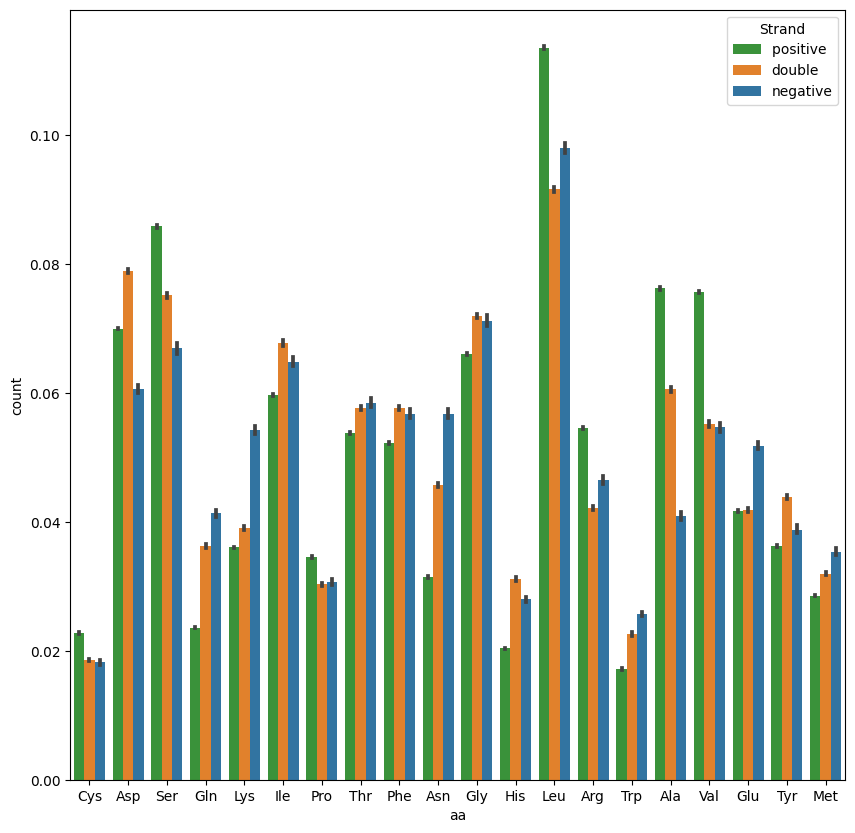

In [30]:
fig = plt.figure(figsize=(10, 10))
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative' : 'tab:blue'
}
ax = sns.barplot(x="aa", y='count', hue="Strand", data=rdrp_data_stack, palette=palette, ax=fig.gca(), order = order_list)
fig.savefig('../figures/mean_aa_rdrp.pdf', dpi=300, bbox_inches = 'tight')

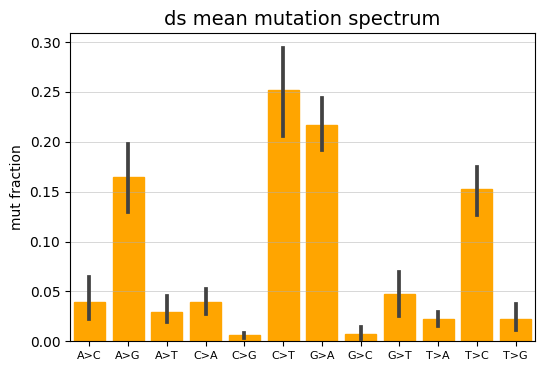

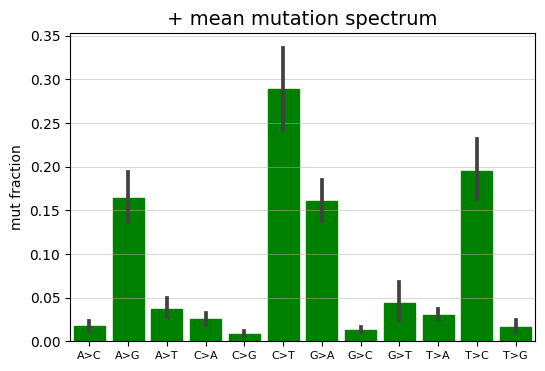

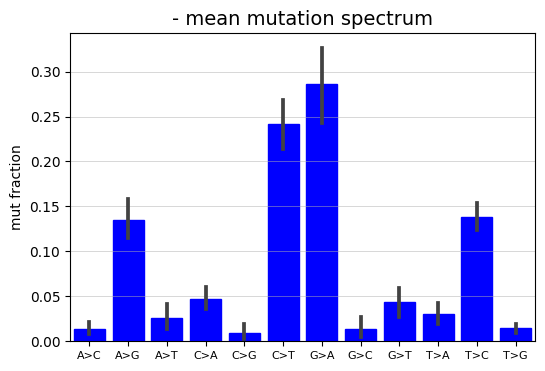

In [31]:
for strand in viruses_specs['RNAsense'].unique():
    if strand == '+':
        color_mapping12 = {
            "C>A": "green",
            "G>T": "green",
            "C>G": "green",
            "G>C": "green",
            "C>T": "green",
            "G>A": "green",
            "T>A": "green",
            "A>T": "green",
            "T>C": "green",
            "A>G": "green",
            "T>G": "green",
            "A>C": "green"}
    elif strand == '-':
        color_mapping12 = {
            "C>A": "blue",
            "G>T": "blue",
            "C>G": "blue",
            "G>C": "blue",
            "C>T": "blue",
            "G>A": "blue",
            "T>A": "blue",
            "A>T": "blue",
            "T>C": "blue",
            "A>G": "blue",
            "T>G": "blue",
            "A>C": "blue"}
    else:
        color_mapping12 = {
            "C>A": "orange",
            "G>T": "orange",
            "C>G": "orange",
            "G>C": "orange",
            "C>T": "orange",
            "G>A": "orange",
            "T>A": "orange",
            "A>T": "orange",
            "T>C": "orange",
            "A>G": "orange",
            "T>G": "orange",
            "A>C": "orange"}
    
    
    strand_data = viruses_specs[viruses_specs['RNAsense'] == strand]
    
    sbs12_ordered = ["A>C", "A>G", "A>T", "C>A", "C>G", "C>T", "G>A", "G>C", "G>T", "T>A", "T>C", "T>G"]
    colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]
    
    strand_data.to_csv('../data_obtain/nemu_spec_mean_{}.csv'.format(strand))
    
    fig = plt.figure(figsize=(6, 4))
    ax = sns.barplot(x="Mut", y='MutSpec', data=strand_data, order=sbs12_ordered, ax=fig.gca())
    ax.grid(axis="y", alpha=.7, linewidth=0.5)
    for bar, clr in zip(ax.patches, colors12):
        bar.set_color(clr)
    ax.set_title('{} mean mutation spectrum'.format(strand), fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("mut fraction")
    plt.xticks(fontsize=8)
    plt.savefig('../figures/nemu_spec_mean_{}.pdf'.format(strand))
    plt.show()
    plt.close()

In [32]:
strand_data

,Mut,ObsNum,ExpNum,MutSpec,MutSpec_q05,MutSpec_median,MutSpec_q95,virus_name,RNAsense
36,A>C,4.99990,191.6510,0.008852,0.003486,0.007390,0.014423,11320,-
37,A>G,98.98370,233.6980,0.143715,0.127306,0.142971,0.160884,11320,-
38,A>T,5.99959,142.6170,0.014274,0.004789,0.014281,0.024020,11320,-
39,C>A,17.99600,77.0157,0.079285,0.053385,0.076248,0.104313,11320,-
40,C>T,96.98270,165.8810,0.198377,0.171655,0.200439,0.228004,11320,-
...,...,...,...,...,...,...,...,...,...
343,G>C,1.00000,188.6110,0.002743,0.000000,0.000000,0.006038,57482,-
344,G>T,24.99110,188.6110,0.068552,0.050418,0.069504,0.085917,57482,-
345,T>A,6.99731,249.7530,0.014495,0.004345,0.013093,0.023280,57482,-
346,T>C,224.62100,631.4770,0.184034,0.165620,0.184182,0.205567,57482,-
